In [1]:
import input
import post_processing
import pre_processing
import tools
import classifiers
import feature_transformation
import feature_selection
import feature_engineering


[INPUT] Reading input CSV files


# Get Input Data

In [2]:
x = input.x
y = input.y
test_data = input.test_data
y_col = ['status_group']
x_cols = list(x.columns.values)[1:]

id_col = ['id']
x_id_df = x[id_col]
test_data_id_df = test_data[id_col]

x_cols

['amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

# Descriptive Analysis

overview of data

In [3]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

Statistical Summary

In [4]:
x.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    215.000000   
max     1776.000000     99.000000      80.000000  30500.000000   

       construction_year  
count       59400.000000  
mean         1300.652475  
std           951.620547  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

Value missing columns

In [5]:
x.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Number of unique values in each column

In [6]:
x.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

Unique value counts

In [7]:
x.value_counts()

id     amount_tsh  date_recorded  funder                  gps_height  installer          longitude  latitude       wpt_name             num_private  basin                    subvillage  region  region_code  district_code  lga           ward          population  public_meeting  recorded_by              scheme_management  scheme_name                       permit  construction_year  extraction_type  extraction_type_group  extraction_type_class  management        management_group  payment                payment_type  water_quality  quality_group  quantity      quantity_group  source        source_type   source_class  waterpoint_type              waterpoint_type_group
2      0.0         2011-03-27     Lvia                    0           LVIA               36.115056  -6.279268e+00  Bombani              0            Wami / Ruvu              Songambele  Dodoma  1            4              Chamwino      Msamalo       0           True            GeoData Consultants Ltd  VWC                Mgun  

Data types

In [8]:
x.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

Train, Test data shape

In [9]:
print("\n   x_train     y_train    x_test\n", x.shape, y.shape, test_data.shape)


   x_train     y_train    x_test
 (59400, 40) (59400, 2) (14850, 40)


# Plot Y label Distribution

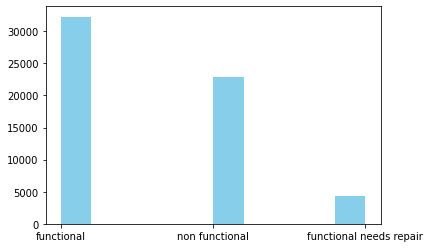

In [10]:
post_processing.histogram(y, y_col[0])

# Feature Distribution

[Stacked bar plot] payment


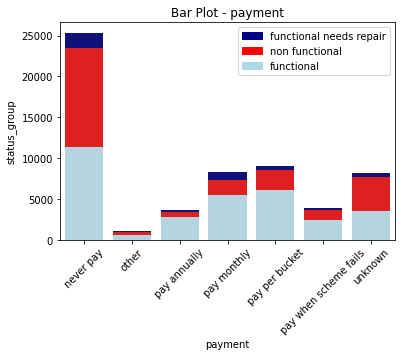

[percentage stacked bar plot] payment


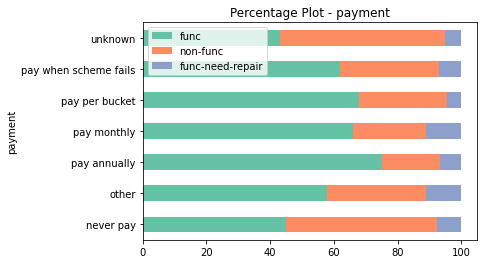

[Stacked bar plot] water_quality


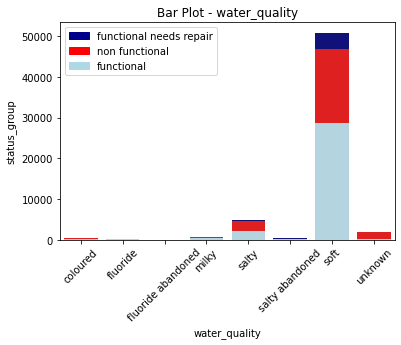

[percentage stacked bar plot] water_quality


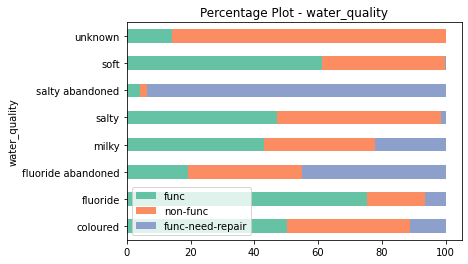

[Stacked bar plot] source_class


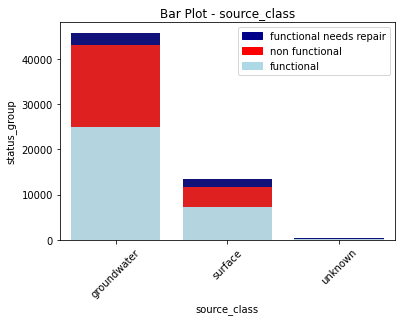

[percentage stacked bar plot] source_class


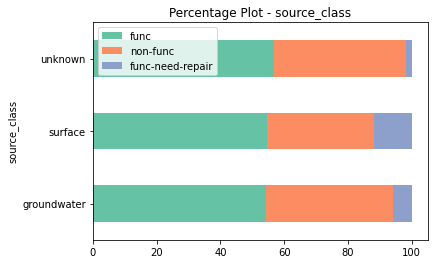

[Stacked bar plot] scheme_management


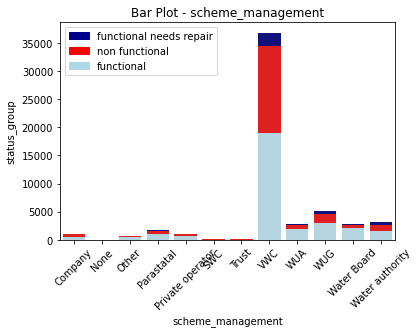

[percentage stacked bar plot] scheme_management


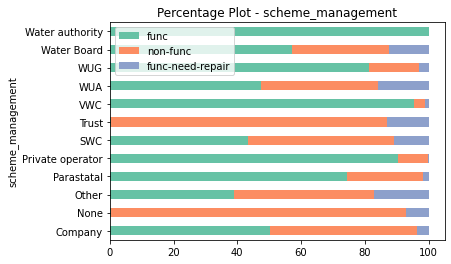

[Stacked bar plot] waterpoint_type_group


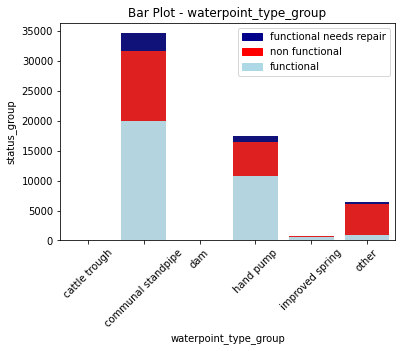

[percentage stacked bar plot] waterpoint_type_group


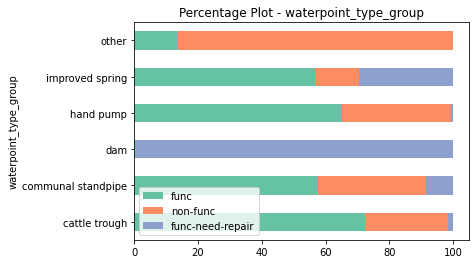

In [11]:
category_cols = ['payment', 'water_quality', 'source_class', 'scheme_management', 'waterpoint_type_group']
post_processing.plot_all_features(x=x.copy(), y=y.copy(), x_cols=category_cols, y_col=y_col[0])

# Correlation Analysis

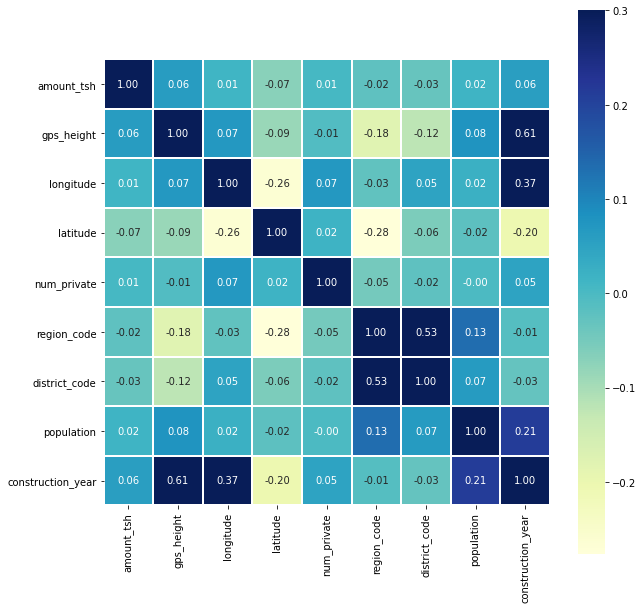

In [12]:
post_processing.statistical_analysis_pearson(df=x)

# Feature Transformation

Impute missing values

In [13]:
nul_col_x = tools.check_any_column_with_null_val(df=x)
nul_col_test = tools.check_any_column_with_null_val(df=test_data)
x = pre_processing.fill_null_values_using_most_frequent(dataframe=x, columns=nul_col_x)
test_data = pre_processing.fill_null_values_using_most_frequent(dataframe=test_data, columns=nul_col_test)

Create new features

In [14]:
print("\n[Map construction_year]")
x = feature_transformation.map_feature_construction_year(x)
test_data = feature_transformation.map_feature_construction_year(test_data)

print("\n[Map date_recorded]")
x = feature_transformation.map_feature_date_recorded(df=x)
test_data = feature_transformation.map_feature_date_recorded(df=test_data)

print("\n[Map longitude and latitude]")
x = feature_transformation.map_longitude_latitude(df=x, min_bound=1)
test_data = feature_transformation.map_longitude_latitude(df=test_data, min_bound=1)

print("\n[Map gps_height]")
x = feature_transformation.map_gps_height(df=x, min_bound=1)
test_data = feature_transformation.map_gps_height(df=test_data, min_bound=1)

print("\n[Map columns with small occurrences]")
x, test_data = tools.map_small_occurrences_to_other(x=x, test_x=test_data, occurrences=20)


[Map construction_year]

[Map date_recorded]

[Map longitude and latitude]


c:\users\wageesha erangi\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\wageesha erangi\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)



[Map gps_height]


c:\users\wageesha erangi\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\wageesha erangi\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)



[Map columns with small occurrences]


# Encoding

In [15]:
x, test_data = tools.encode_object_bool_types(df_x=x, df_test=test_data)

# Final Processing

y column label mapping

In [16]:
y[y_col[0]] = y[y_col[0]].map({"functional": 0, "non functional": 1, "functional needs repair": 2})
y = y[y_col]

Normalize

In [17]:
x = pre_processing.normalize_min_max(x)
test_data = pre_processing.normalize_min_max(test_data)

x.drop('id', axis=1, inplace=True)
x[id_col] = x_id_df[id_col]

test_data.drop('id', axis=1, inplace=True)
test_data[id_col] = test_data_id_df[id_col]

[Normalize - Min Max]
[Normalize - Min Max]


# Feature Selection

In [ ]:
selected_features = feature_selection.SequentialForwardFeatureSelection(x=x, y=y)
x = x[id_col + selected_features]
test_data = test_data[id_col + selected_features]

# PCA

In [18]:
pca, x_pca, loadings = feature_engineering.pca_feature_creation(x=x, n_components=4)
x = x.join(x_pca)

test_pca, test_x_pca, test_loadings = feature_engineering.pca_feature_creation(x=test_data, n_components=4)
test_data = test_data.join(test_x_pca)

# Train Data

In [19]:
x.head()

amount_tsh    funder  gps_height  installer  longitude  latitude  wpt_name  \
0    0.017143  0.721103    0.500360   0.705091   0.496455  0.168357  0.999605   
1    0.000000  0.183457    0.718660   0.195965   0.529302  0.712606  0.056455   
2    0.000000  0.268293    0.503602   0.268012   0.474167  0.892147  0.990525   
3    0.000000  0.259809    0.564841   0.201729   0.656504  0.783069  0.173707   
4    0.000071  1.000000    0.246758   0.961575   0.731374  0.734986  1.000000   

   num_private  basin  subvillage  ...  permit_False  permit_True  \
0          0.0  0.125    1.000000  ...           1.0          0.0   
1          0.0  0.000    0.849018  ...           1.0          0.0   
2          0.0  0.500    1.000000  ...           0.0          1.0   
3          0.0  0.625    0.849018  ...           0.0          1.0   
4          0.0  0.625    0.471358  ...           0.0          1.0   

   source_class_groundwater  source_class_surface  source_class_unknown  \
0                       1.0                   0.0                   0.0   
1                       1.0                   0.0                   0.0   
2                       0.0                   1.0                   0.0   
3                       0.0                   1.0                   0.0   
4                       0.0                   1.0                   0.0   

      id           PC1       PC2       PC3       PC4  
0  69572  32456.868232  1.032171  0.203587 -0.740575  
1   8776 -28339.131768  1.035000  0.120914  0.269858  
2  34310  -2805.131768 -0.850461  0.828525 -0.183408  
3  67743  30627.868232 -0.850861  0.886991 -0.720841  
4  19728 -17387.131768 -0.833283  0.772122  0.481999  

[5 rows x 50 columns]

# Test Data

In [20]:
test_data.head()

amount_tsh    funder  gps_height  installer  longitude  latitude  wpt_name  \
0    0.000000  0.647932    0.008419   0.202312   0.200833  0.983251  1.000000   
1    0.000000  0.593849    0.516641   0.202312   0.371919  0.791146  1.000000   
2    0.001176  0.173913    0.129736   0.202312   0.766249  0.430525  1.000000   
3    0.000000  0.955461    0.380373   0.152216   0.628320  0.534695  0.938193   
4    0.000000  0.325557    0.106391   0.340077   0.692694  0.370926  0.143027   

   num_private  basin  subvillage  ...  permit_False  permit_True  \
0          0.0   0.50    1.000000  ...           0.0          1.0   
1          0.0   0.50    1.000000  ...           0.0          1.0   
2          0.0   1.00    1.000000  ...           0.0          1.0   
3          0.0   1.00    0.449447  ...           1.0          0.0   
4          0.0   0.75    0.252149  ...           1.0          0.0   

   source_class_groundwater  source_class_surface  source_class_unknown  \
0                       1.0                   0.0                   0.0   
1                       1.0                   0.0                   0.0   
2                       1.0                   0.0                   0.0   
3                       1.0                   0.0                   0.0   
4                       1.0                   0.0                   0.0   

      id           PC1       PC2       PC3       PC4  
0  50785 -13623.027071 -0.266069 -0.443741 -0.095028  
1  51630 -14468.027071 -0.270266 -0.546801  0.134443  
2  17168  19993.972930 -0.222913 -0.497636 -0.073286  
3  45559  -8397.027070  1.034873 -0.036089  0.472140  
4  49871 -12709.027071  1.038515 -0.061912  0.459041  

[5 rows x 50 columns]

# Features

In [21]:
list(x.columns)

['amount_tsh',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'scheme_management',
 'scheme_name',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'waterpoint_type',
 'waterpoint_type_group',
 'day',
 'month',
 'year',
 'public_meeting_False',
 'public_meeting_True',
 'recorded_by_GeoData Consultants Ltd',
 'permit_False',
 'permit_True',
 'source_class_groundwater',
 'source_class_surface',
 'source_class_unknown',
 'id',
 'PC1',
 'PC2',
 'PC3',
 'PC4']

# Train, Test data shape

In [22]:
print("\n   x_train     y_train    x_test\n", x.shape, y.shape, test_data.shape)


   x_train     y_train    x_test
 (59400, 50) (59400, 1) (14850, 50)


# Random Forest

In [23]:
predictions = classifiers.RandomForest(x_train=x.copy(), y_train=y.copy(), x_test=test_data.copy())
tools.write_submittable_output(test_data=test_data.copy(), y_col=y_col[0], predictions=predictions, filename='output_rf')


[Random forest]

[Predictions]
[0 0 0 ... 1 0 1]

[Submittable dataframe]
      id    status_group
0  50785      functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional

[Value counts]
functional                 11752
non functional              3097
functional needs repair        1
Name: status_group, dtype: int64

[OUTPUT] Writing to CSV file output_rf.csv


Feature importance


[Feature Importance]

[PLOT - RF Feature Importance]


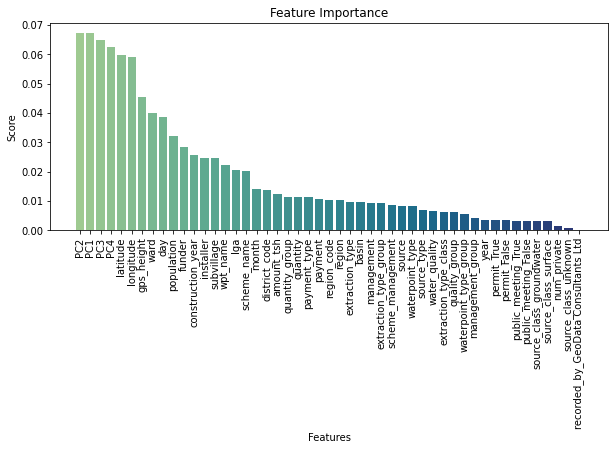

In [24]:
feature_importance_df = post_processing.get_rf_feature_importance(x_cols=x.columns)
post_processing.plot_rf_feature_importance(feature_importance_df)

Partial dependency plots


[Partial dependence plots]
amount_tsh


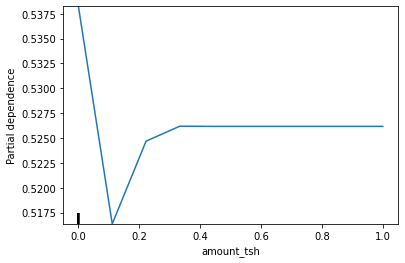

funder


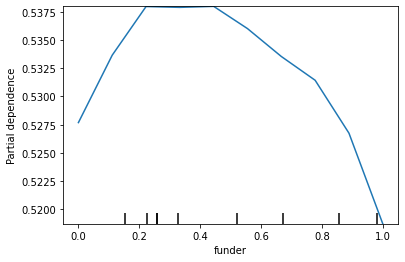

gps_height


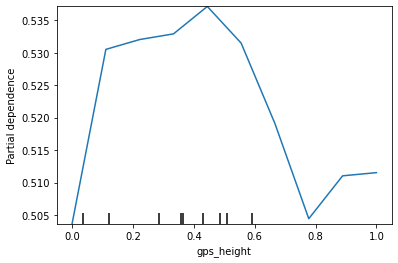

installer


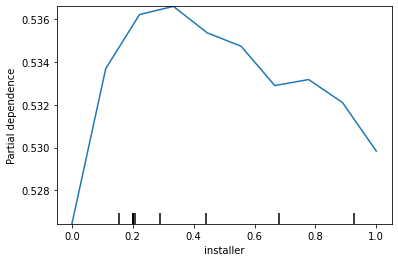

longitude


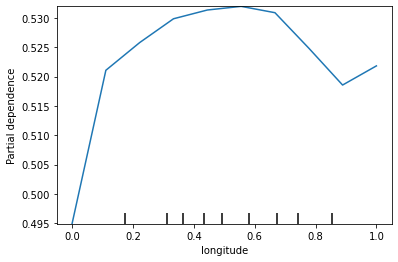

latitude


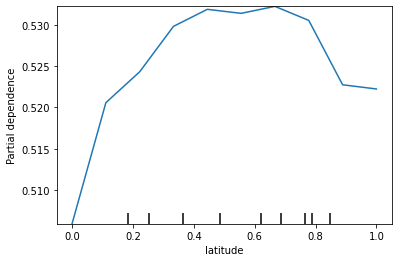

wpt_name


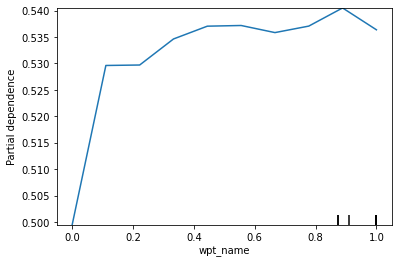

num_private


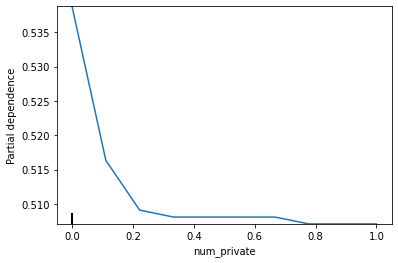

basin


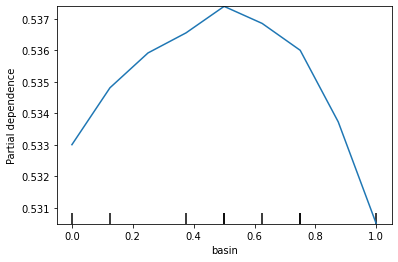

subvillage


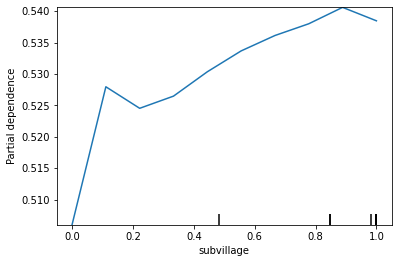

region


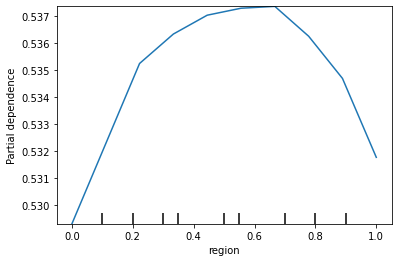

region_code


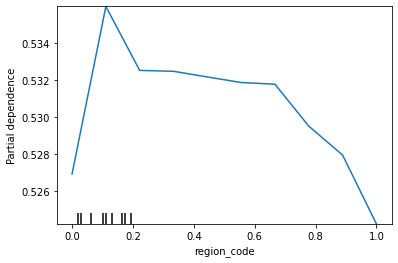

district_code


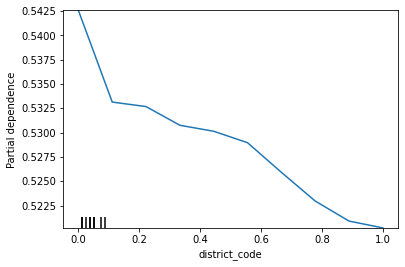

lga


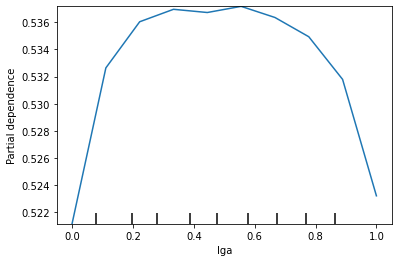

ward


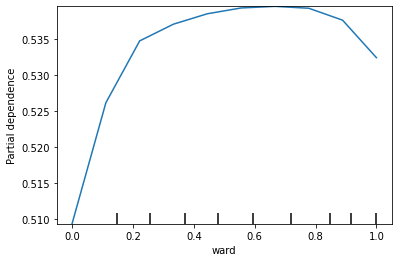

population


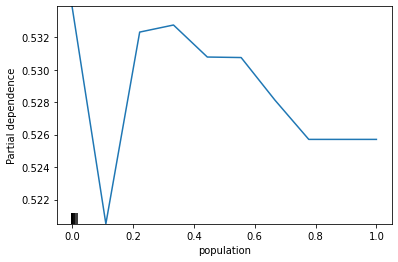

scheme_management


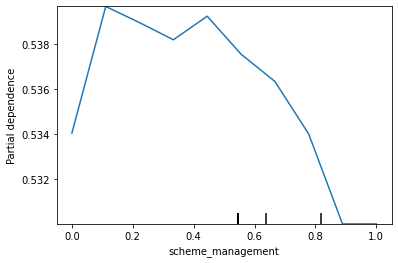

scheme_name


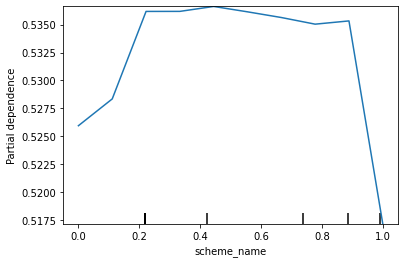

construction_year


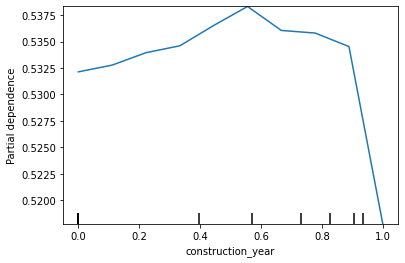

extraction_type


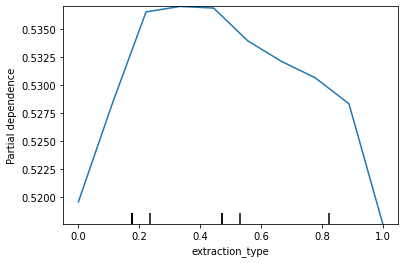

extraction_type_group


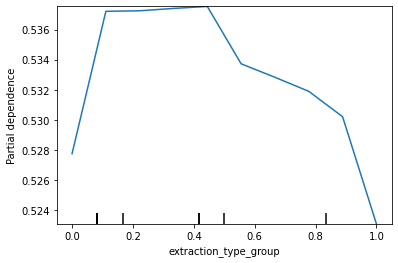

extraction_type_class


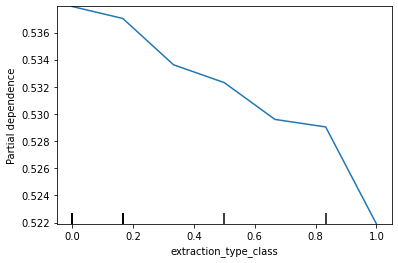

management


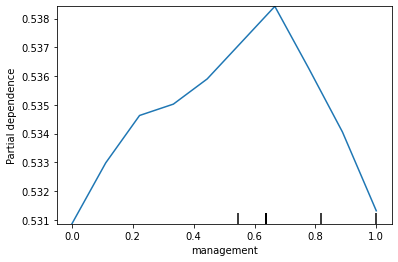

management_group


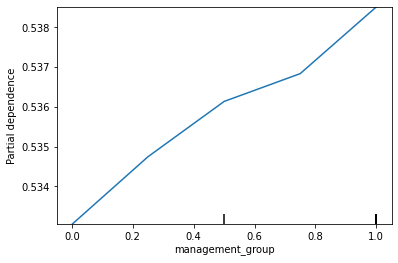

payment


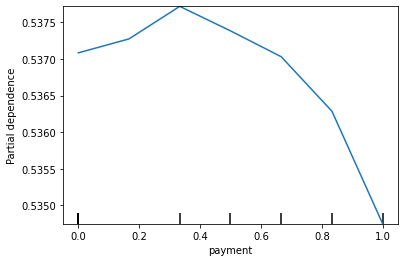

payment_type


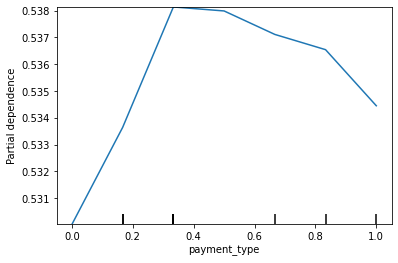

water_quality


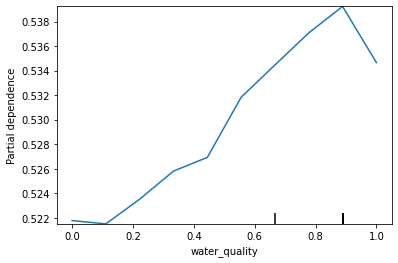

quality_group


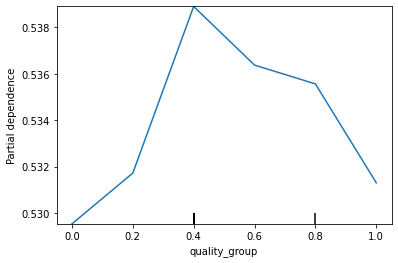

quantity


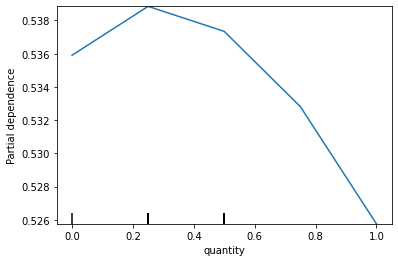

quantity_group


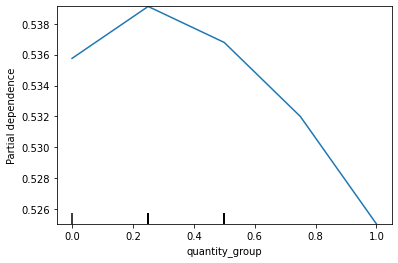

source


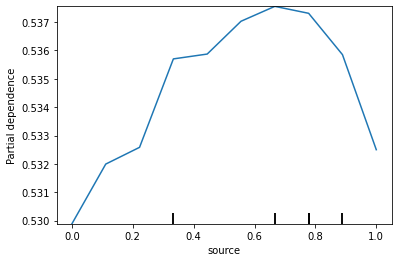

source_type


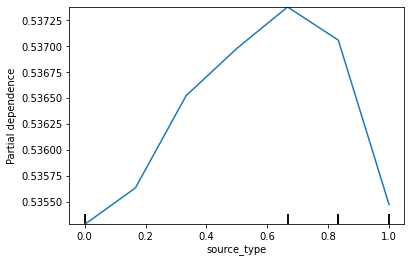

waterpoint_type


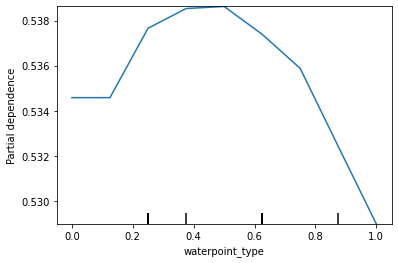

waterpoint_type_group


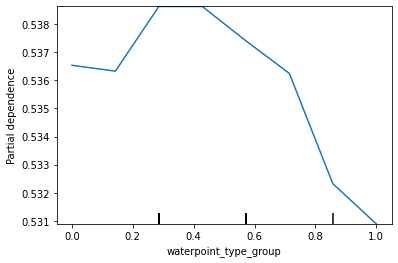

day


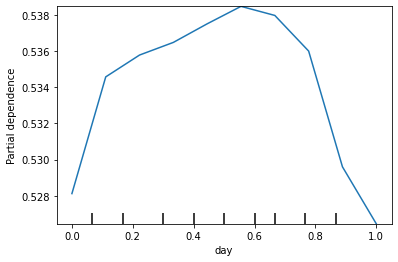

month


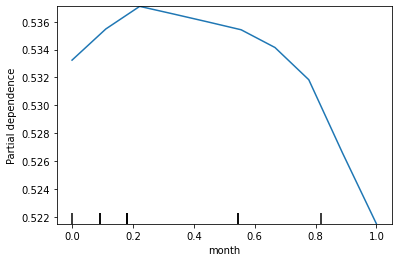

year


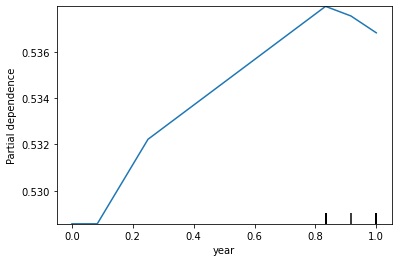

public_meeting_False


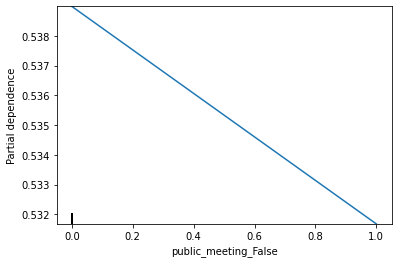

public_meeting_True


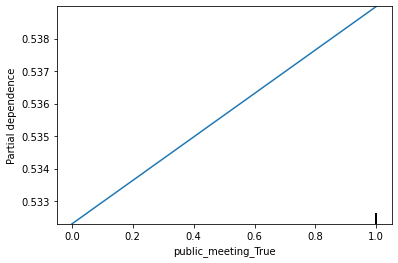

recorded_by_GeoData Consultants Ltd


c:\users\wageesha erangi\appdata\local\programs\python\python39\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:735: UserWarning: Attempting to set identical bottom == top == 0.5386091561974679 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])


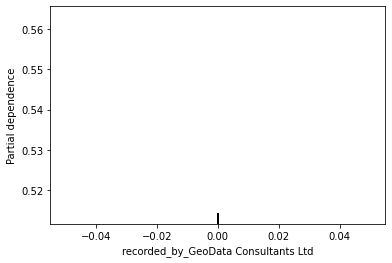

permit_False


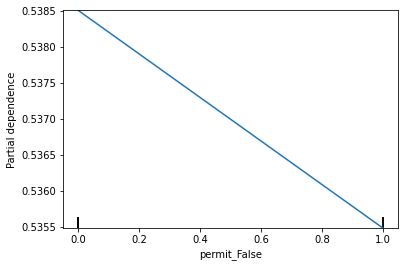

permit_True


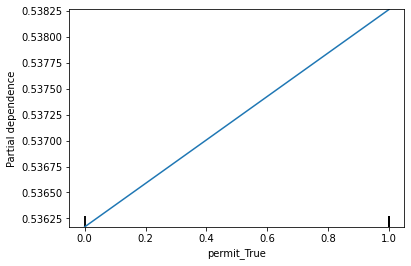

source_class_groundwater


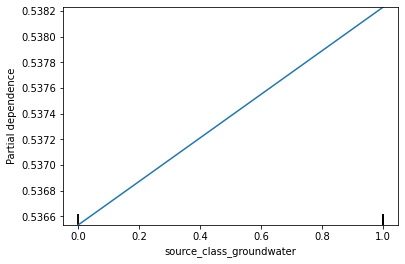

source_class_surface


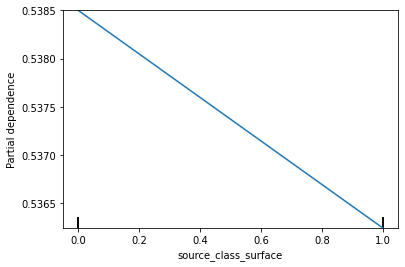

source_class_unknown


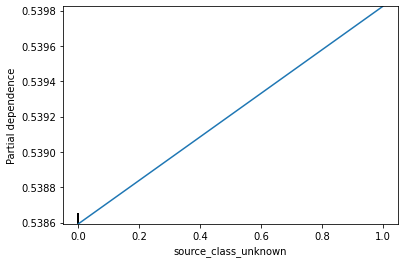

PC1


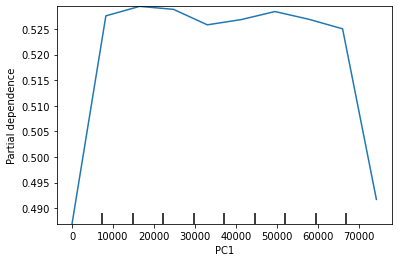

PC2


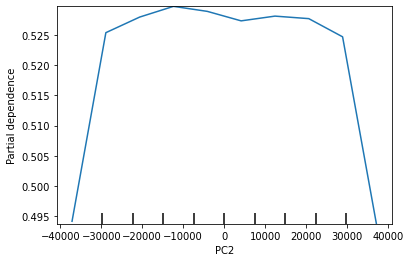

PC3


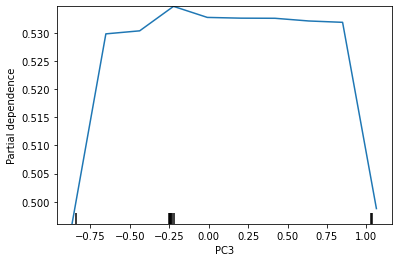

PC4


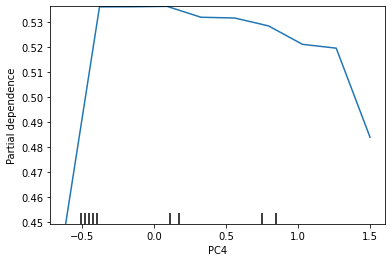

In [25]:
post_processing.partial_dependency_plots(x=x)

# Ensemble Method

In [26]:
predictions = classifiers.ensemble_model(x_train=x.copy(), y_train=y.copy(), x_test=test_data.copy())
tools.write_submittable_output(test_data=test_data.copy(), y_col=y_col[0], predictions=predictions, filename='output_ensemble')


[Random forest]

[Gradient Boosting]

[XGBoost]

[Predictions]
[0 0 0 ... 1 0 1]

[Submittable dataframe]
      id    status_group
0  50785      functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional

[Value counts]
functional        11543
non functional     3307
Name: status_group, dtype: int64

[OUTPUT] Writing to CSV file output_ensemble.csv


Feature importance


[Feature Importance]

[PLOT - Ensemble-method Feature Importance]


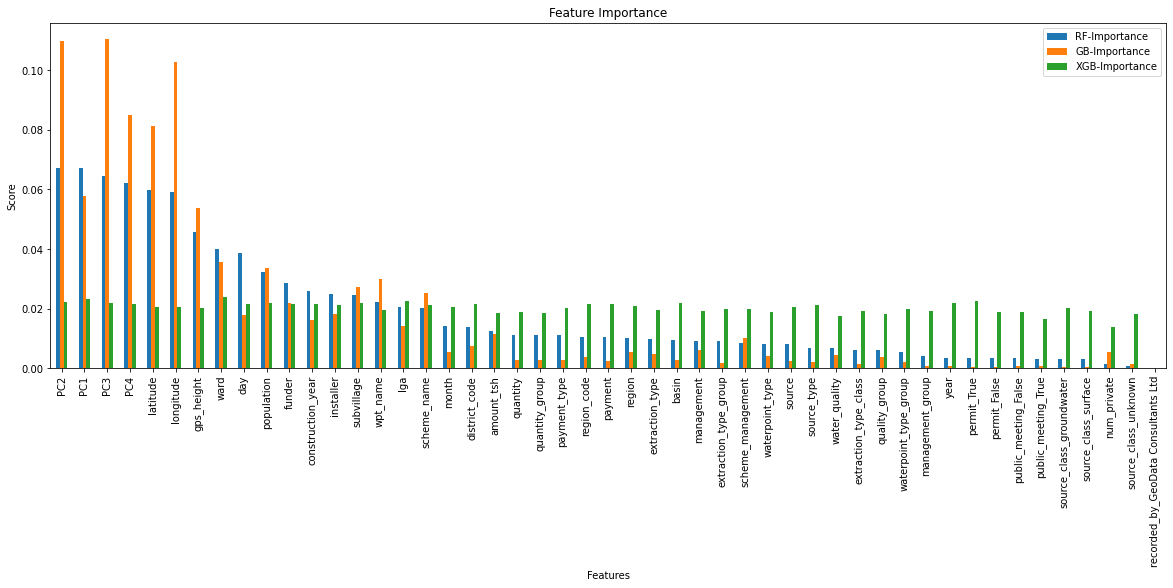

In [27]:
feature_importance_df = post_processing.get_ensemble_clf_feature_importance(x_cols=x.columns)
post_processing.plot_ensemble_feature_importance(feature_importance_df)

# Gradient Boost

In [28]:
predictions = classifiers.GradientBoost(x_train=x.copy(), y_train=y.copy(), x_test=test_data.copy())
tools.write_submittable_output(test_data=test_data.copy(), y_col=y_col[0], predictions=predictions,
                               filename='output_gb')


[Gradient Boosting]

[Predictions]
[1 1 0 ... 0 0 2]

[Submittable dataframe]
      id    status_group
0  50785  non functional
1  51630  non functional
2  17168      functional
3  45559      functional
4  49871  non functional

[Value counts]
functional needs repair    6587
functional                 5330
non functional             2933
Name: status_group, dtype: int64

[OUTPUT] Writing to CSV file output_gb.csv


# XGBoost

In [29]:
predictions = classifiers.XGBoost(x_train=x.copy(), y_train=y.copy(), x_test=test_data.copy())
tools.write_submittable_output(test_data=test_data.copy(), y_col=y_col[0], predictions=predictions,
                               filename='output_xgb')


[XGBoost]

[Predictions]
[0 0 0 ... 1 1 0]

[Submittable dataframe]
      id    status_group
0  50785      functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional

[Value counts]
functional        12317
non functional     2533
Name: status_group, dtype: int64

[OUTPUT] Writing to CSV file output_xgb.csv


# ADABoost

In [30]:
predictions = classifiers.AdaBoost(x_train=x.copy(), y_train=y.copy(), x_test=test_data.copy())
tools.write_submittable_output(test_data=test_data.copy(), y_col=y_col[0], predictions=predictions,
                               filename='output_adab')


[AdaBoost]

[Predictions]
[0 0 0 ... 0 0 0]

[Submittable dataframe]
      id status_group
0  50785   functional
1  51630   functional
2  17168   functional
3  45559   functional
4  49871   functional

[Value counts]
functional                 12770
non functional              1621
functional needs repair      459
Name: status_group, dtype: int64

[OUTPUT] Writing to CSV file output_adab.csv


# SVM

In [32]:
predictions = classifiers.SVM(x_train=x.copy(), y_train=y.copy(), x_test=test_data.copy())
tools.write_submittable_output(test_data=test_data.copy(), y_col=y_col[0], predictions=predictions,
                               filename='output_svm')


[SVM]

[Predictions]
[0 0 0 ... 0 0 0]

[Submittable dataframe]
      id status_group
0  50785   functional
1  51630   functional
2  17168   functional
3  45559   functional
4  49871   functional

[Value counts]
functional    14850
Name: status_group, dtype: int64

[OUTPUT] Writing to CSV file output_svm.csv


# NN

In [33]:
predictions = classifiers.NN(x_train=x.copy(), y_train=y.copy(), x_test=test_data.copy())
tools.write_submittable_output(test_data=test_data.copy(), y_col=y_col[0], predictions=predictions,
                               filename='output_nn')


NN
Epoch 1/10
1857/1857 [==============================] - 29s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5417
Epoch 2/10
1857/1857 [==============================] - 12s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5432
Epoch 3/10
1857/1857 [==============================] - 12s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5444
Epoch 4/10
1857/1857 [==============================] - 12s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5406
Epoch 5/10
1857/1857 [==============================] - 13s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5443
Epoch 6/10
1857/1857 [==============================] - 11s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5388
Epoch 7/10
1857/1857 [==============================] - 12s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5408
Epoch 8/10
1857/1857 [==============================] - 13s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5429
Epoch 9/10
1857/1857 [==============================] - 12s 6ms/step - loss: nan - accuracy: 0.5458
Epoch 10/10
1857/1857 [=================

c:\users\wageesha erangi\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



[Predictions]
[0 0 0 ... 0 0 0]

[Submittable dataframe]
      id status_group
0  50785   functional
1  51630   functional
2  17168   functional
3  45559   functional
4  49871   functional

[Value counts]
functional    14850
Name: status_group, dtype: int64

[OUTPUT] Writing to CSV file output_nn.csv
